The dataset provides information about forest fires in Brasil for the years between 1998 and 2017
Information is provided based on the state and month
The dataset can be found at this link:
https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv", encoding='latin1')

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
df.shape

#6454 rows and 5 columns

(6454, 5)

In [5]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [6]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [7]:
df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [8]:
df.month.replace({"Janeiro":"Jan", "Fevereiro":"Feb", "Março":"Mar","Abril":"Apr","Maio":"May","Junho":"Jun","Julho":"Jul","Agosto":"Aug","Setembro":"Sep","Outubro":"Oct","Novembro":"Nov","Dezembro":"Dec"}, inplace=True)

#change name of the month from portuguese to english

In [9]:
df.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [10]:
df.isna().sum()

#no NAs

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
df.year.describe()

#the dataset contains information about forest fires between 1998 and 2017

count    6454.000000
mean     2007.461729
std         5.746654
min      1998.000000
25%      2002.000000
50%      2007.000000
75%      2012.000000
max      2017.000000
Name: year, dtype: float64

In [12]:
df.number.sum()

#number of fires regiestered in the time period under consideration (1998-2017)

698924.073

In [13]:
df.head()

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01


In [14]:
df.groupby("year").number.sum()

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

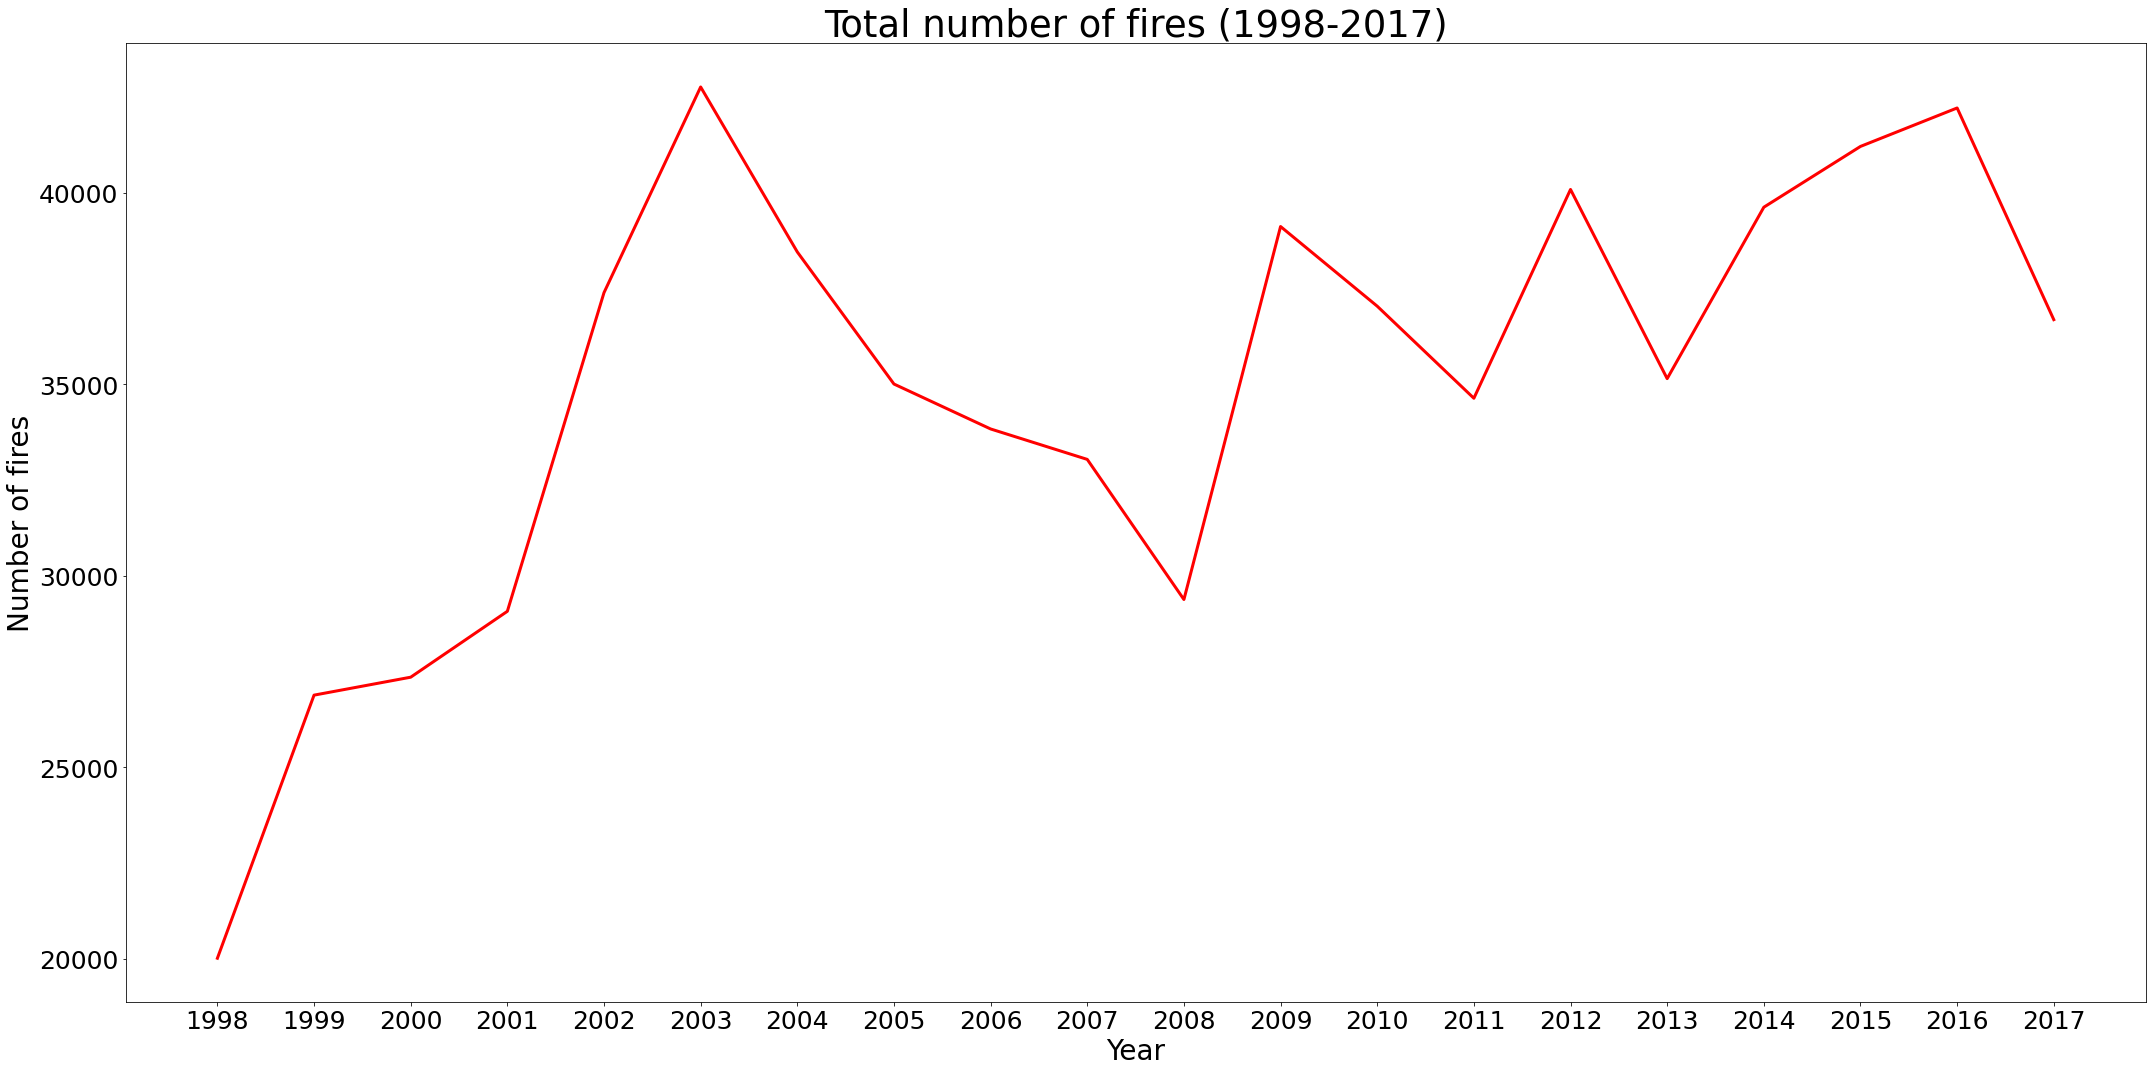

In [23]:
plt.figure(figsize=(30,15))
plt.plot(df.groupby("year").number.sum().index, df.groupby("year").number.sum().values, linewidth=3, color="red")
plt.xticks(ticks = df.groupby("year").number.sum().index,labels=df.groupby("year").number.sum().index)
plt.title("Total number of fires (1998-2017)",fontdict={"fontsize": 37})
plt.xlabel("Year",fontdict={"fontsize": 28})
plt.ylabel("Number of fires", fontdict={"fontsize": 28})
plt.tick_params(labelsize = 25)

plt.tight_layout()





From the graph above we can see that the number of fires has increased over the years compared to the starting point (1998).
It is also interesting that the number of fires has decreased significantly between 2003 and 2008 but has increased again from 2008.



In [26]:
df.number.sum()/19

#average number of fires by year

36785.477526315786

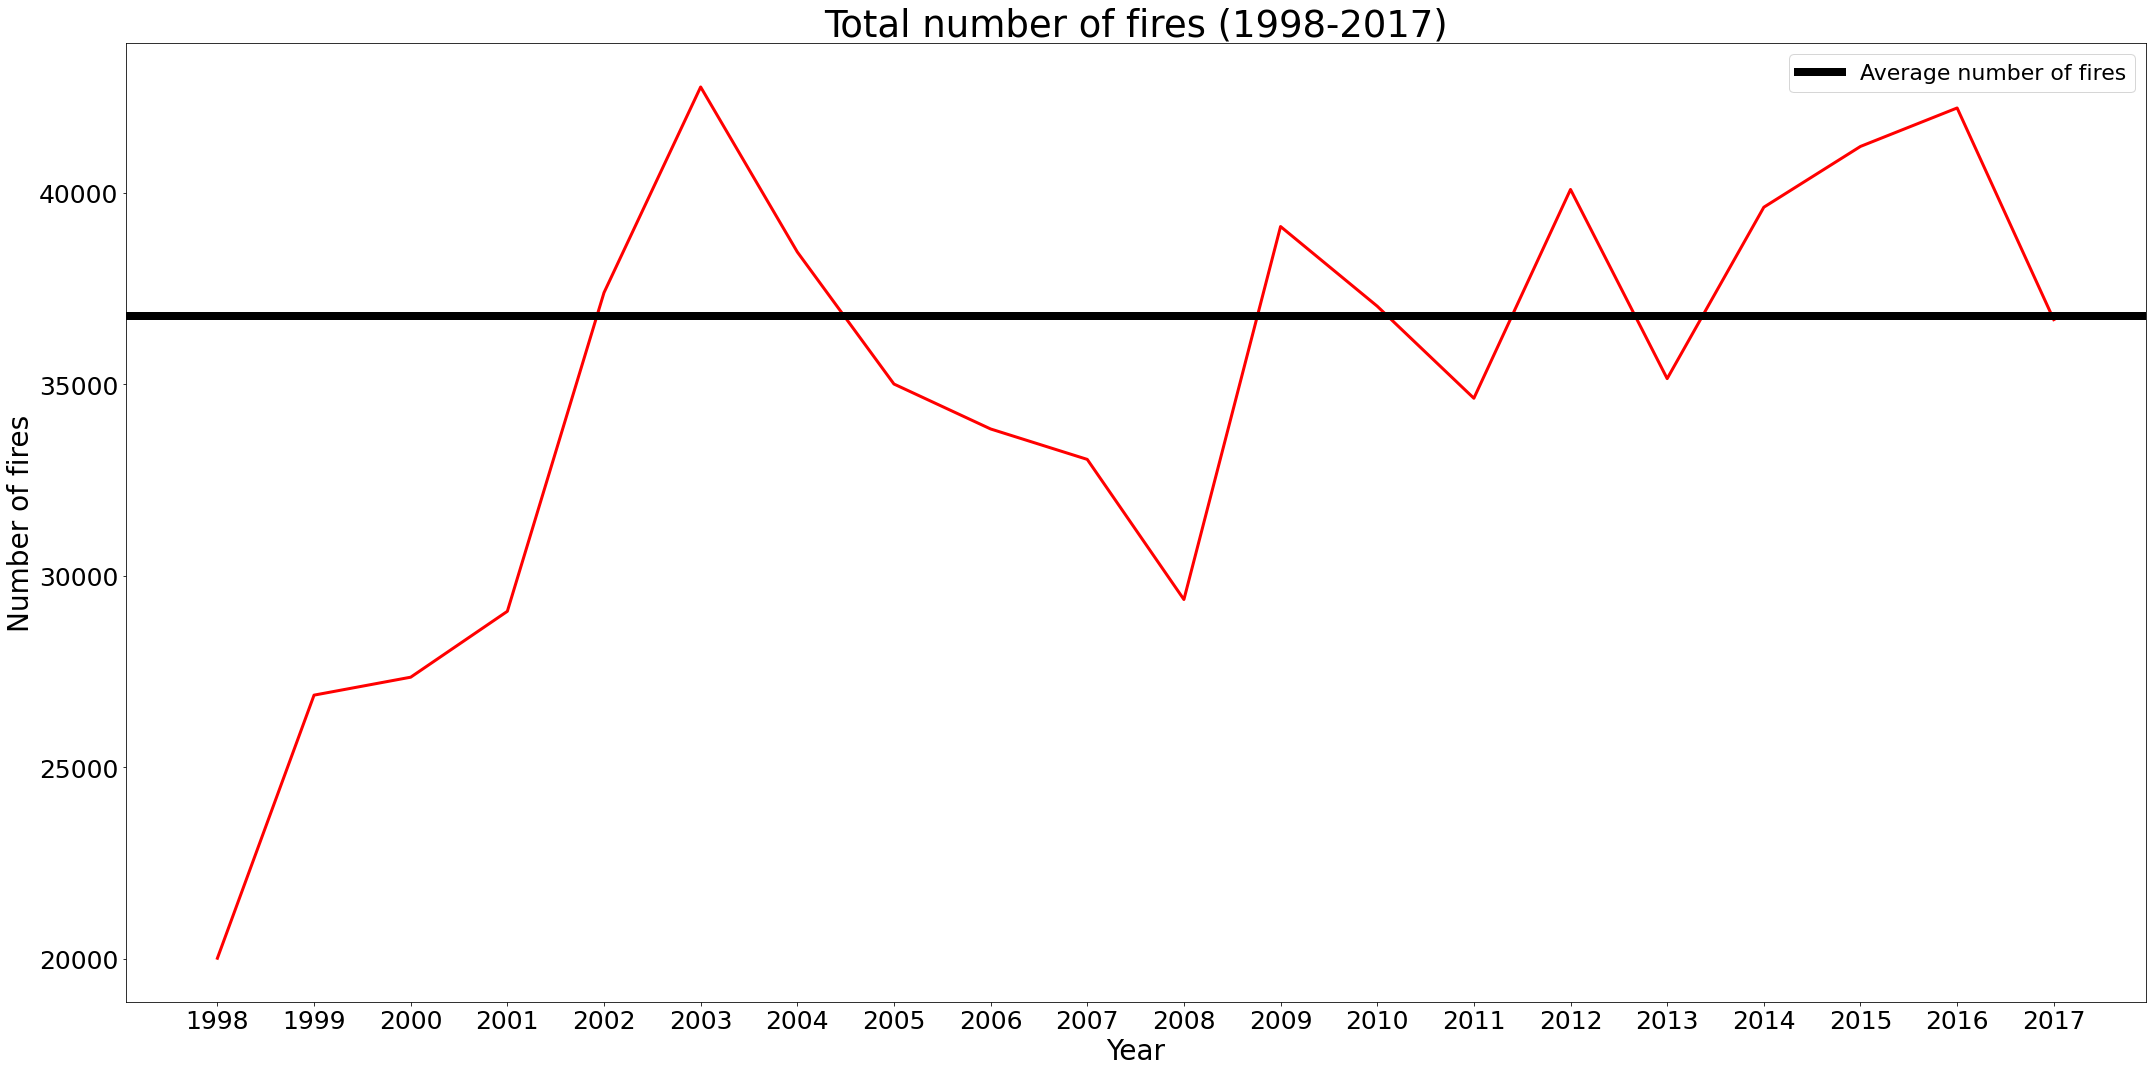

In [82]:
years = df.groupby("year").number.sum().index
values = df.groupby("year").number.sum().values
average_num_fires = df.number.sum()/19

plt.figure(figsize=(30,15))
plt.plot(years, values, linewidth=3, color="red")

plt.title("Total number of fires (1998-2017)",fontdict={"fontsize": 37})
plt.xlabel("Year",fontdict={"fontsize": 28})
plt.ylabel("Number of fires", fontdict={"fontsize": 28})
plt.tick_params(labelsize = 25)
plt.xticks(ticks = df.groupby("year").number.sum().index,labels=df.groupby("year").number.sum().index)
plt.axhline(df.number.sum()/19, label="Average number of fires", color="black", linewidth=8)

plt.legend(fontsize=22)


plt.tight_layout()

The graph above adds some information to the previous graph.
A line representing the average number of fires between the timeperiod into consideration (1998-2017) has been added.
This allows to identify years/periods where the number of fires has been greater than the average number

Text(0.5, 1.0, 'Number of fires by month')

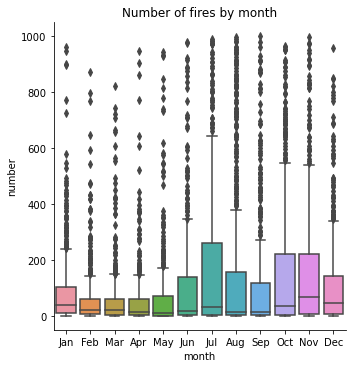

In [16]:
sns.catplot(x = "month",y = "number", kind="box", data=df)
plt.title("Number of fires by month")

Text(0.5, 1.0, 'Number of fires by month')

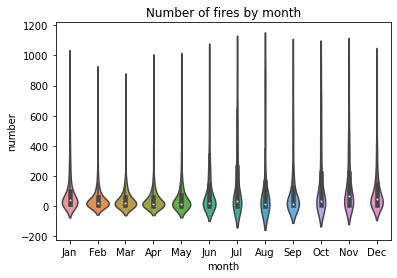

In [43]:
sns.violinplot(x = "month",y = "number", kind="box", data=df)
plt.title("Number of fires by month")

In [17]:
df.groupby("state").number.sum()

state
Acre                18464.030
Alagoas              4644.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52435.918
Pará                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45160.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

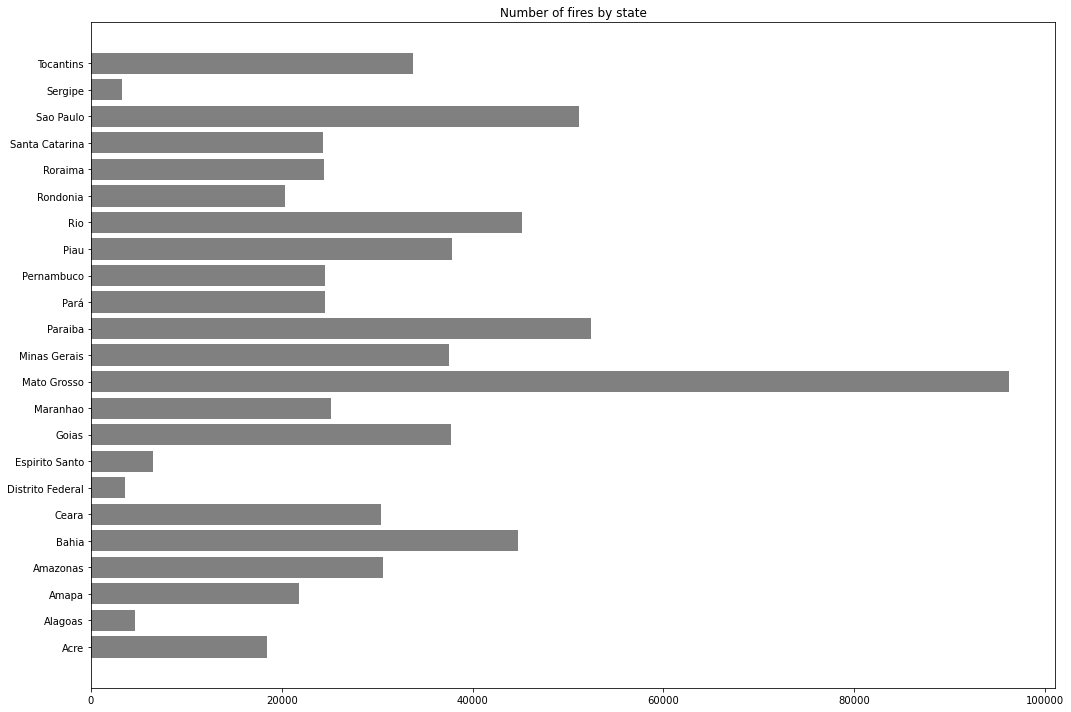

In [39]:
plt.figure(figsize=(15,10))
plt.barh(df.groupby("state").number.sum().index,df.groupby("state").number.sum().values, color="grey" )
plt.title("Number of fires by state")
plt.tight_layout()


The graph above allows to identify states characterized by a higher number of fires.
We can see for example that Mato Gross is the state with the biggest number of fires followed by Paraiba and Sao Paolo.

By contrast we can see that Sergipe, Distrito Federal and Alagoas are the states with the least number of fires.

In [41]:
df.groupby("state").number.sum().sort_values(ascending=False).head(5)

state
Mato Grosso    96246.028
Paraiba        52435.918
Sao Paulo      51121.198
Rio            45160.865
Bahia          44746.226
Name: number, dtype: float64

5 states with the most number of fires

In [42]:
df.groupby("state").number.sum().sort_values(ascending=True).head(5)

state
Sergipe              3237.00
Distrito Federal     3561.00
Alagoas              4644.00
Espirito Santo       6546.00
Acre                18464.03
Name: number, dtype: float64

5 states with the least number of fires

created dataframe with only the five states with the most number of fires

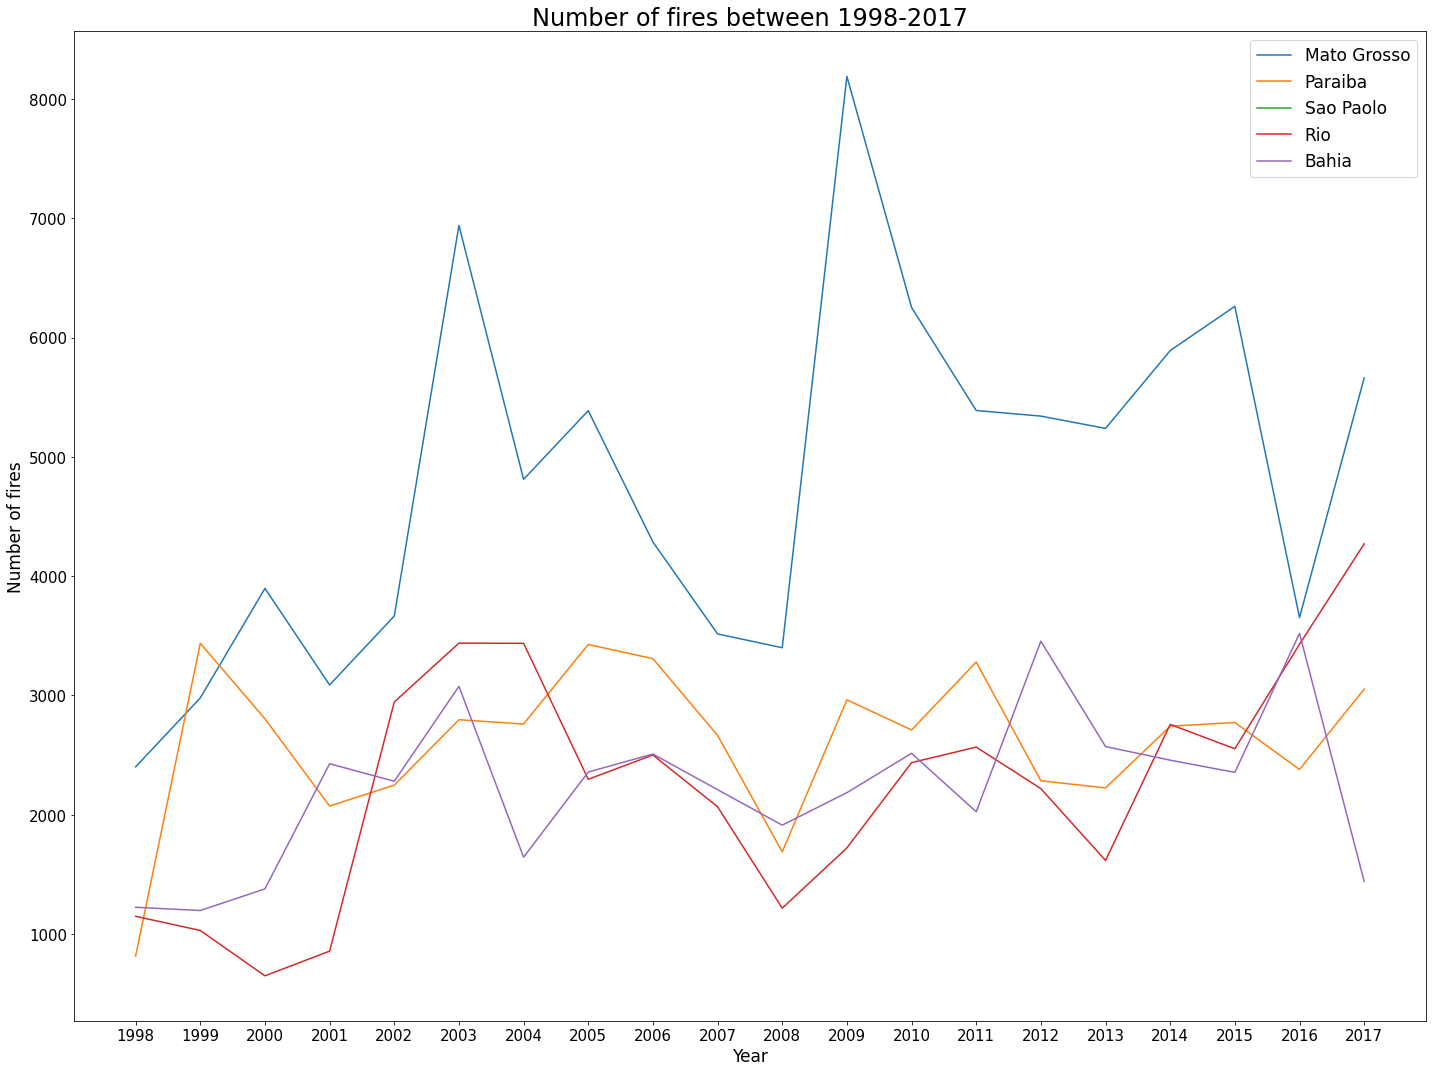

In [63]:
plt.figure(figsize=(20,15))
plt.plot(df.loc[df.state == "Mato Grosso"].groupby("year").number.sum().index, df.loc[df.state == "Mato Grosso"].groupby("year").number.sum().values, label="Mato Grosso")
plt.plot(df.loc[df.state == "Paraiba"].groupby("year").number.sum().index, df.loc[df.state == "Paraiba"].groupby("year").number.sum().values, label="Paraiba")
plt.plot(df.loc[df.state == "Sao Paolo"].groupby("year").number.sum().index, df.loc[df.state == "Sao Paolo"].groupby("year").number.sum().values, label="Sao Paolo")
plt.plot(df.loc[df.state == "Rio"].groupby("year").number.sum().index, df.loc[df.state == "Rio"].groupby("year").number.sum().values, label="Rio")
plt.plot(df.loc[df.state == "Bahia"].groupby("year").number.sum().index, df.loc[df.state == "Bahia"].groupby("year").number.sum().values, label="Bahia")
plt.xticks(ticks=df.loc[df.state == "Mato Grosso"].groupby("year").number.sum().index, labels=df.loc[df.state == "Mato Grosso"].groupby("year").number.sum().index)
plt.xlabel("Year",fontdict={"fontsize":17})
plt.ylabel("Number of fires",fontdict={"fontsize":17})
plt.title("Number of fires between 1998-2017",fontdict={"fontsize":24} )
plt.tick_params(labelsize = 15)
plt.legend(fontsize=17)
plt.tight_layout()





evolution of fires between 1998-2017 among the five states with the most number of fires 